In [1]:
import os
import random
import shutil
import json

In [2]:
def generate_pairs(content_dir, stylizations_dir, sample_size, output_json_path):
    """
    Generate pairs of images for training and store them in a JSON file.
    - True pair: Original image + style transfer image
    - False pair: Style transfer image + style transfer image
    """
    pairs = []  # List to store pairs of image paths
    labels = []  # List to store labels (1 for true pair, 0 for false pair)

    content_images = [f for f in os.listdir(content_dir) if f.endswith('.jpg')]
    stylization_images = [f for f in os.listdir(stylizations_dir) if f.endswith('.jpg')]

    # Generate sample pairs
    for _ in range(sample_size):
        # Create true pair: original content + style transfer image
        content_image = random.choice(content_images)
        style_image = random.choice(stylization_images)

        pair_1 = {
            'image_1': os.path.join(content_dir, content_image),
            'image_2': os.path.join(stylizations_dir, style_image),
            'label': 1  # True pair
        }
        pairs.append(pair_1)
        labels.append(1)  # True pair

        # Create false pair: style transfer + style transfer
        style_image_2 = random.choice(stylization_images)
        pair_2 = {
            'image_1': os.path.join(stylizations_dir, style_image),
            'image_2': os.path.join(stylizations_dir, style_image_2),
            'label': 0  # False pair
        }
        pairs.append(pair_2)
        labels.append(0)  # False pair

    # Store pairs and labels in JSON format
    data = {
        'pairs': pairs,
        'labels': labels
    }

    with open(output_json_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)

    print(f"Stored {len(pairs)} pairs in {output_json_path}")

    return pairs, labels

In [3]:
content_dir = r'D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents'
stylizations_dir = r'D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\stylizations'

In [4]:
# output_json_path = 'image_pairs.json'

# sample_size = 2500
# pairs, labels = generate_pairs(content_dir, stylizations_dir, sample_size, output_json_path)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image: resize and normalize to [0, 1] range.
    """
    print(f"Loading image: {image_path}")

    image_path = image_path.replace("\\", "/")

    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0

In [7]:
def split_pairs_into_json(json_path, train_json_path, val_json_path, test_json_path, test_size=0.2, val_size=0.2):
    """
    Split the pairs from the original JSON into training, validation, and test sets and save to new JSON files.
    """
    # Load the original pairs from JSON
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    pairs = data['pairs']
    labels = data['labels']

    # Shuffle the pairs to ensure random splitting
    combined_data = list(zip(pairs, labels))
    random.shuffle(combined_data)

    # Split into training, validation, and test sets
    total_pairs = len(combined_data)
    
    test_count = int(total_pairs * test_size)
    val_count = int(total_pairs * val_size)
    
    # Split data
    test_data = combined_data[:test_count]
    val_data = combined_data[test_count:test_count+val_count]
    train_data = combined_data[test_count+val_count:]

    # Prepare for saving the split data
    train_pairs, train_labels = zip(*train_data)
    val_pairs, val_labels = zip(*val_data)
    test_pairs, test_labels = zip(*test_data)

    # Save to JSON files
    with open(train_json_path, 'w') as f:
        json.dump({'pairs': train_pairs, 'labels': train_labels}, f, indent=4)

    with open(val_json_path, 'w') as f:
        json.dump({'pairs': val_pairs, 'labels': val_labels}, f, indent=4)

    with open(test_json_path, 'w') as f:
        json.dump({'pairs': test_pairs, 'labels': test_labels}, f, indent=4)

    print(f"Saved training data to {train_json_path}")
    print(f"Saved validation data to {val_json_path}")
    print(f"Saved test data to {test_json_path}")

In [8]:
json_path = r'D:\University\Thesis\Dataset\style-transfer-dataset-main\image_pairs.json'
train_json_path = r'D:\University\Thesis\Dataset\train.json'
val_json_path = r'D:\University\Thesis\Dataset\val.json'  
test_json_path = r'D:\University\Thesis\Dataset\test.json'  

In [9]:
# split_pairs_into_json(json_path, train_json_path, val_json_path, test_json_path)

In [10]:
def count_pairs_in_json(json_path):
    """
    Load a JSON file and return the number of pairs.
    """
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    # Count the number of pairs
    num_pairs = len(data['pairs'])
    return num_pairs

In [11]:
train_pairs_count = count_pairs_in_json(train_json_path)
val_pairs_count = count_pairs_in_json(val_json_path)
test_pairs_count = count_pairs_in_json(test_json_path)

print(f"Number of pairs in training set: {train_pairs_count}")
print(f"Number of pairs in validation set: {val_pairs_count}")
print(f"Number of pairs in test set: {test_pairs_count}")

Number of pairs in training set: 3000
Number of pairs in validation set: 1000
Number of pairs in test set: 1000


In [12]:
def load_pairs_from_json(json_path):
    """
    Load pairs from JSON and preprocess images.
    """
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    pairs = data['pairs']
    labels = data['labels']

    # Preprocess image pairs (converting paths to image data)
    img1_data = np.array([preprocess_image(pair['image_1'], target_size=(224, 224)) for pair in pairs])
    img2_data = np.array([preprocess_image(pair['image_2'], target_size=(224, 224)) for pair in pairs])

    labels = np.array(labels)

    return img1_data, img2_data, labels

In [13]:
train_img1, train_img2, train_labels = load_pairs_from_json(train_json_path)

Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_19.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_20.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_21.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_40.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\stylizations\content_37___style_49___500.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_30.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\stylizations\content_44___style_5___150.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-data

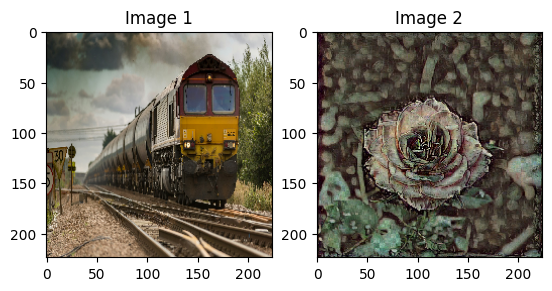

In [14]:
import matplotlib.pyplot as plt

img1 = train_img1[1]
img2 = train_img2[1]

# Plot the images
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Image 2")

plt.show()

# MODEL

In [15]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

In [16]:
def cnn_model(input_shape=(224, 224, 3)):
    """
    Base CNN for Siamese branches.
    """
    inputs = Input(input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs, x)

def siamese_model(input_shape=(224, 224, 3)):
    """
    Siamese network that compares two images.
    """
    base_cnn = cnn_model(input_shape)

    input_a = Input(input_shape)
    input_b = Input(input_shape)

    encoded_a = base_cnn(input_a)
    encoded_b = base_cnn(input_b)

    # Absolute difference between encodings
    distance = Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([encoded_a, encoded_b])
    output = Dense(1, activation='sigmoid')(distance)

    model = Model(inputs=[input_a, input_b], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [17]:
val_img1, val_img2, val_labels = load_pairs_from_json(val_json_path)
test_img1, test_img2, test_labels = load_pairs_from_json(test_json_path)

Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_14.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_13.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\stylizations\content_3___style_25___150.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_40.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\stylizations\content_1___style_27___500.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_12.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-dataset-main\contents\content_8.jpg
Loading image: D:\University\Thesis\Dataset\style-transfer-dataset-main\style-transfer-datase

In [ ]:
model = siamese_model()
model.summary()

history = model.fit(
    [train_img1, train_img2],
    train_labels,
    validation_data=([val_img1, val_img2], val_labels),
    epochs=10,
    batch_size=32
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │ 396,512,3… │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 396,512,449 (1.48 GB)

 Trainable params: 396,512,449 (1.48 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/94 ━━━━━━━━━━━━━━━━━━━━ 56:42 41s/step - accuracy: 0.4522 - loss: 12.5377